In [2]:
%pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.6 MB/s eta 0:00:00


**YOUR_SURNAME YOUR_FRISTNAME**

The goal is to train evolutoinary algorithm to solve classic optimization function. The function is **Rastrigin** function, but it is reversed and shifted.
The maximum value that you can achieve is 10 and this is your goal!

Send me a link to your colab notebook to
***michael.melnik@itmo.ru***

In [3]:
import numpy
import deap
import math
import numpy as np
from deap import tools, base, creator, algorithms
import numpy.random as rnd


In [10]:
#Shifted Rastrigin function

noise = rnd.random(1000)

def rastrigin(individual):
    individual = individual + noise[0:len(individual)]
    n = len(individual)

    pi = math.pi
    dn = 1.0 / n
    a = 10.0
    b = 0.2
    c = 2 * pi
    s1 = 0.0
    s2 = 0.0
    for i in range(n):
        s1 += individual[i] * individual[i]
        s2 += np.cos(c*individual[i])
    s1 = -a * math.exp(-b*math.sqrt(dn*s1))
    s2 = -math.exp(dn*s2)
    result = s1+s2 + a + math.exp(1)
    result = -result
    result = result + a
    result = math.fabs(result)
    return result

In [12]:
solution = [0 for _ in range(20)]
rastrigin(solution)

6.97235644234401

In [13]:
creator.create("BaseFitness", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.BaseFitness)


In [14]:
def mutation(individual):
    n = len(individual)
    for i in range(n):
        if rnd.random() < n * 0.15:
            individual[i] += rnd.normal(0.0, 0.2)
            individual[i] = np.clip(individual[i], -5, 5)
    return individual,

In [15]:
class SimpleGAExperiment:
    def factory(self):
        return rnd.random(self.dimension) * 10 - 5 # random range from -5 to 5

    def __init__(self, function, dimension, pop_size, iterations):
        self.pop_size = pop_size
        self.iterations = iterations
        self.mut_prob = 0.6
        self.cross_prob = 0.3

        self.function = function
        self.dimension = dimension

        # self.pool = Pool(5)
        self.engine = base.Toolbox()
        # self.engine.register("map", self.pool.map)
        self.engine.register("map", map)
        self.engine.register("individual", tools.initIterate, creator.Individual, self.factory)
        self.engine.register("population", tools.initRepeat, list, self.engine.individual, self.pop_size)
        self.engine.register("mate", tools.cxOnePoint)
        self.engine.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
        # self.engine.register("mutate", mutation)
        self.engine.register("select", tools.selTournament, tournsize=4)
        # self.engine.register("select", tools.selRoulette)
        self.engine.register("evaluate", self.function)


    def run(self):
        pop = self.engine.population()
        hof = tools.HallOfFame(3, np.array_equal)
        stats = tools.Statistics(lambda ind: ind.fitness.values[0])
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = algorithms.eaMuPlusLambda(pop, self.engine, mu=self.pop_size, lambda_=int(self.pop_size*0.8), cxpb=self.cross_prob, mutpb=self.mut_prob,
                                  ngen=self.iterations,
                                  stats=stats, halloffame=hof, verbose=True)
        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))
        return log

In [17]:
def function(x):
    res = rastrigin(x)
    return res,

dimension = 10 # set it to 100
pop_size = 50 # lets say max is 100
iterations = 500 # lets say max is 5000
scenario = SimpleGAExperiment(function, dimension, pop_size, iterations)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def read_log(log):
    avg_list = list()
    std_list = list()
    min_list = list()
    max_list = list()
    gen_list = list()
    for g in log:
        avg_list.append(g['avg'])
        std_list.append(g['std'])
        min_list.append(g['min'])
        max_list.append(g['max'])
        gen_list.append(g['gen'])
    return np.array(gen_list), np.array(avg_list), np.array(std_list), np.array(max_list), np.array(min_list)

def draw_log(log):
    gen_list, avg_list, std_list, max_list, min_list = read_log(log)
    plt.plot(gen_list, avg_list, label="avg")
    plt.plot(gen_list, min_list, label="min")
    plt.plot(gen_list, max_list, label="max")
    plt.fill_between(gen_list, avg_list-std_list, avg_list+std_list, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

def draw_logs(log1, log2, lab1, lab2):
    gen1, avg1, std1, max1, min1 = read_log(log1)
    gen2, avg2, std2, max2, min2 = read_log(log2)
    plt.plot(gen1, avg1, label=lab1, color="blue")
    plt.plot(gen1, max1, label="{}_max".format(lab1), color="blue", linewidth=2)
    plt.fill_between(gen1, avg1 - std1, avg1 + std1, alpha=0.2, color="blue")
    plt.plot(gen2, avg2, label=lab2, color="orange")
    plt.plot(gen2, max2, label="{}_max".format(lab2), color="orange", linewidth=2)
    plt.fill_between(gen2, avg2 - std2, avg2 + std2, alpha=0.2, color="orange")
    plt.legend()
    plt.tight_layout()
    plt.show()


gen	nevals	avg    	std     	min    	max    
0  	50    	3.94619	0.465621	2.77962	4.85877
1  	37    	4.56314	0.24488 	3.98621	5.04432
2  	35    	4.8592 	0.22071 	4.43436	5.70133
3  	37    	5.05322	0.221397	4.64985	5.70133
4  	35    	5.25623	0.23843 	4.85877	5.97521
5  	36    	5.49841	0.234938	5.04432	5.97521
6  	36    	5.75063	0.153662	5.34236	6.1023 
7  	38    	5.92951	0.142385	5.70133	6.17349
8  	39    	6.17174	0.166974	5.8155 	6.50952
9  	39    	6.38194	0.158096	6.1023 	6.74836
10 	36    	6.52521	0.0893247	6.35288	6.74836
11 	37    	6.62474	0.120797 	6.367  	6.93562
12 	37    	6.76718	0.104882 	6.5227 	7.03077
13 	35    	6.88277	0.0881874	6.70149	7.08692
14 	38    	6.95711	0.0618801	6.74836	7.15278
15 	31    	7.02908	0.0866544	6.90978	7.26662
16 	34    	7.10826	0.103227 	6.93562	7.34977
17 	36    	7.17757	0.0928053	7.03397	7.51715
18 	35    	7.30086	0.11263  	7.08795	7.51715
19 	36    	7.40112	0.105959 	7.26662	7.53541
20 	36    	7.49337	0.0798991	7.26739	7.6753 
21 	39    	7.56973	0.

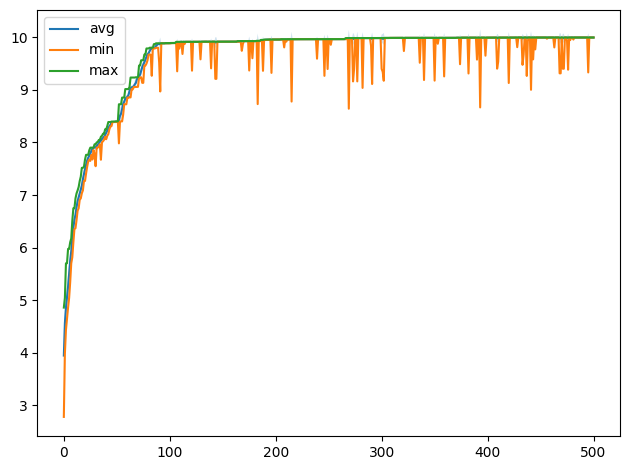

In [19]:
log = scenario.run()
draw_log(log)